# AI Community @ Семинар № 5, весна 2019
## Сегментация изображения.

**Сегментация** - задача компьютерного зрения, при которой необходимо не только определить класс объекта, но и локализовать его с точностью до пикселя на изображении. 

![](https://cdn-images-1.medium.com/max/800/0*k8ejti9_6CHwxzFQ.gif)
[Источник](https://towardsdatascience.com/review-segnet-semantic-segmentation-e66f2e30fb96)

Сегментация в свою очередь имеет две подзадачи:
1. Семантическая сегментация (Semantic segmentation)
1. Сегментация объектов (Instance segmentation)

## Семантическая сегментация

![](https://docplayer.ru/docs-images/63/48510909/images/40-2.jpg)

**Семантическая сегментация** - это задача присвоения класса каждому пикселю в данном изображении

## Cегментация объектов

![](https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2019/02/instanceSegmentation.png)

**Сегментация объектов** - это задача поиска объектов одного класса на изображении и присвоение пикселям номера этих объектов.

## Методы

Задача сегментации существует с момента зарождения компьютерного зрения. Классическое компьютерное зрение предлагает следующие варианты решения задачи:
1. Метод k-средних при кластеризации по цветам
1. Методы, основанные на гистограммах
1. Методы разреза графа(http://www.csd.uwo.ca/courses/CS4487a/HW3/hw3.html)
1. Метод водораздела(https://en.wikipedia.org/wiki/Watershed_(image_processing)
1. И др.

Классические метода эффективны в плане времени исполнения, но имеют низкое качество на сложных задачах сегментации, таких как сегментация дорожной обстановки. На этом занятии мы будем рассматривать только современные подходы, основанные на глубоком обучении. Классические алгоритмы остаются материалом для самостоятельного изучения. Но никто не говорит, что их не нужно изучать - они могут быть эффективно применены в более простых задачах.

## Что предсказываем

*Вход*: как правило в модель подаются изображения (RGB/одноканальные/другое)  
*Выход*: обычно ожидается одноканальное изображение того же размера, что и вход. В этом изображении в каждом пикселе записываются метки классов объектов, которые необходимо сегментировать.

Пример меток классов:
![Пример классов](images/road_classes.png)
[Источник](https://www.mathworks.com/help/vision/ug/semantic-segmentation-examples.html)

## Как оцениваем

Из наиболее популярных способов оценки точности сегментации можно выделить следующие:
1. Для многоклассовой сегментации в качестве функции ошибки можно использовать Categorical Crossentropy. Соответственно в качестве метрики следует взять [многоклассовый F1-score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html)
1. Для бинарной сегментации можно использовать Binary Crossentropy, а в качестве метрики взять F1-score или [Dice coefficient](https://en.wikipedia.org/wiki/S%C3%B8rensen%E2%80%93Dice_coefficient)
1. Так же для бинарной сегментации в качестве функции ошибки можно напрямую использовать отрицание Dice коэффициента.
1. Везде (для многоклассовой сегментации отдельно по классам) можно считать [метрику Intersection over Union (IoU)](https://en.wikipedia.org/wiki/Jaccard_index).

 # Используемые техники

## Encoding and Decoding phase

Основная идея сементациии с использованием нейронных сетей - это выделение ключевых признаков характеризующих класс (encoding phase) и последующее развёртывание этих признаков в изображение исходного размера.

![](https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2019/01/semantic_3.png)

Обычно, в качестве энкодера используется уже предобученная сеть, например, VGG, ResNet.

## Upsampling

В качестве декодера применяют различные техники "разворачивания" карты признаков

### Unpooling


<img src='images/unpooling.jpg'>

Методы, не требующие информации от других слоёв сети

### Max Unpooling

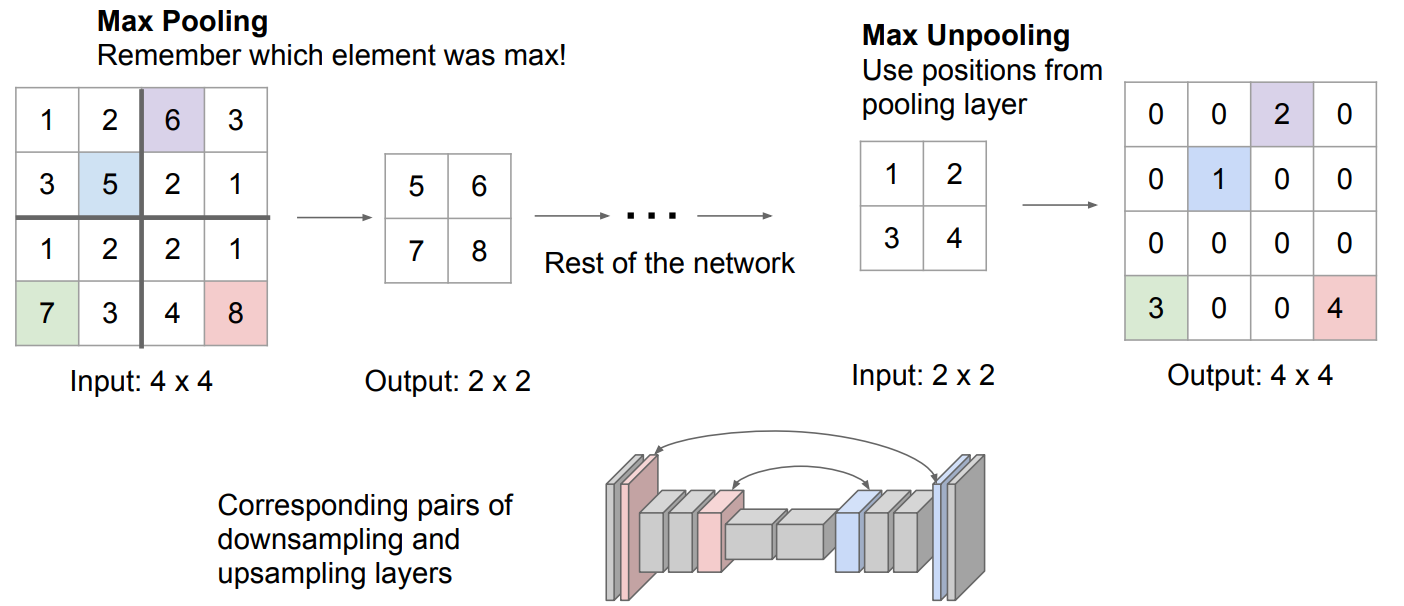

### Learnable Upsampling: Transpose Convolution

![](images/transpose_convolution.bmp)

Суть метода заключается в том, что мы обучаем соответствующий фильтр для разворачивающего слоя и с помощью этого фильтра расширяем матрицу признаков.

### Transpose Convolution 1d Example
![](images/transpose_conv1d.bmp)



## Spatial Pyramid Pooling

Мы хотим, чтобы наша модель была устойчива к размеру объектов на изображении. Это связано с тем, что если наша модель была обучена только изображениям небольших объектов, то она может плохо работать с масштабированными версиями входных изображений. Эта проблема может быть решена с помощью Spatial Pyramid Pooling networks. Они используют несколько масштабированных версий входных данных для обучения и, следовательно, захватывают многомасштабную информацию.

![](https://cdn-images-1.medium.com/max/800/1*Af0rCJ67rVYdfIfhwnwi3A.png)
[Источник](https://medium.com/coinmonks/review-sppnet-1st-runner-up-object-detection-2nd-runner-up-image-classification-in-ilsvrc-906da3753679)

## Atrous (Dilated) Convolutions

In [3]:
%%latex

UsageError: %%latex is a cell magic, but the cell body is empty.


Операции вычисления в свёрточных сетях имеют высокую вычислительную сложность и потому занимают значительное время. Чтобы немного уменьшить время обучения сети, используют следующую концепцию. Вместо того, чтобы делать ядро свёртки монолитным, его расширяют так, что расстояние между двумя элементами ядра состовляло **r** ячеек. Для обычного ядра r = 1

![](https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2019/02/no_padding_no_strides.gif)
Обычная свёртка
![](https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2019/02/dilation-300x289.gif)
Расширенная свёртка
 $$ y[i]=\sum_{k}x[i+r*k]w[k] $$
![](https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2019/01/semantic_5.png)

# Популярные архитектуры

## U-Net

Архитектура [U-Net](https://arxiv.org/abs/1505.04597) была разработана для решения двух медицинских задач:
1. Сегментация структуры нейронов в электронных микроскопических данных.
1. Сегментация клеток на изображениях под микроскопом.

![](images/unet_task.png)

![Архитектура U-Net](images/unet.png)

Что нужно примечательного в архитектуре U-Net:
1. Входные одноканальные изображения достаточно большого размера 512x512
1. Используется конкатенация зеркальных слоев
1. В качестве свертки **up-conv** используется транспонированная свертка (Convolution Transpose), описанная в статье [A guide to convolution arithmetic for deep learning](https://arxiv.org/abs/1603.07285v2)

## SegNet

Архитектура [SegNet](https://arxiv.org/abs/1511.00561) была разработана для решения задач сегментации в in-door и out-door условиях. Ее главным преимуществом является небольшое число параметров для тренировки, что позволяет осуществлять быстрый проход по сети, а так использовать меньший объем обучающей выборки для тренировки.

![](images/segnet_applications.png)

Особенности SegNet:
1. Входные изображения размером 256x256 могут быть многоканальными
1. 13 слоев кодировщика (первая половина сети) топологически идентична VGG16
1. Мэппинг из слоев кодировщика в слои декодировщика происходит на этапах max-pooling с помощью сохраненных индексов

![Архитектура SegNet](images/segnet.png)

## Full-Resolution Residual Networks (FRRN)

Модель FRRN является очень наглядным примером метода многомасштабной обработки. Он выполняет это, используя 2 отдельных потока: остаточный поток и объединяющий поток. FRRN постепенно обрабатывает и сравнивает карты объектов в потоке объединения. В то же время он обрабатывает карты объектов с полным разрешением в остаточном потоке. Таким образом, объединяющий поток обрабатывает семантическую информацию высокого уровня (для высокой точности классификации), а остаточный поток обрабатывает пиксельную информацию низкого уровня (для высокой точности локализации)!

![](https://cdn-images-1.medium.com/max/800/1*LlYK2Pjemx3kNC61yVV-yA.png)

Особенности FRRN:
1. Входные изображения могут быть многоканальными и при этом любого размера.
1. Сохраняет рарешение начального изображения

## DeepLab V3+

[Модель](https://arxiv.org/abs/1802.02611) является улучшением DeepLab V3, использующий предобученный на Imagenet Resnet-101 с расширенной свёрткой. Улучшением является то, что на последнем свёрточном слое энкодера используется Spatial Pyramid Pooling. Теперь вместо ResNet используется [Xception](https://arxiv.org/abs/1610.02357).

![](https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2019/01/semantic_8.png)

Особенности DeepLab V3+
1. Всё операции max pooling заменены depthwise свёрткой с отступом.
1. Дополнительный BatchNorm и активация ReLU добавляются после каждой 3 x 3 Depthwise свертки.
1. Глубина модели увеличивается без изменения структуры передачи данных сети.

[Репозиторий DeepLab V3+](https://github.com/tensorflow/models/tree/master/research/deeplab)

[Ноутбук для тестирования](https://colab.sandbox.google.com/github/tensorflow/models/blob/master/research/deeplab/deeplab_demo.ipynb)

## Еще почитать

1. Обзор существующих Deep Learning подходов в сегментации [Semantic Segmentation with Deep Learning](https://towardsdatascience.com/semantic-segmentation-with-deep-learning-a-guide-and-code-e52fc8958823)
2. Подробная статья посвящённая [DeepLab V3+](https://www.analyticsvidhya.com/blog/2019/02/tutorial-semantic-segmentation-google-deeplab/)
3. [Лекция](http://cs231n.stanford.edu/slides/2018/cs231n_2018_lecture11.pdf) курса cs231n по сегментации и детектированию